# Class 5. Classification

In [17]:
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [18]:
n_data = torch.ones(100, 2)
x0 = torch.normal(2 * n_data, 1)
y0 = torch.zeros(100)
x1 = torch.normal(-2 * n_data, 1)
y1 = torch.ones(100)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)
y = torch.cat((y0, y1), ).type(torch.LongTensor)

In [19]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.out = torch.nn.Linear(n_hidden, n_output)
    
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.out(x)
        return x

In [20]:
net = Net(n_feature=2, n_hidden=100, n_output=2)
print(net)
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
loss_fun = torch.nn.CrossEntropyLoss()
plt.ion()

Net(
  (hidden): Linear(in_features=2, out_features=100, bias=True)
  (out): Linear(in_features=100, out_features=2, bias=True)
)


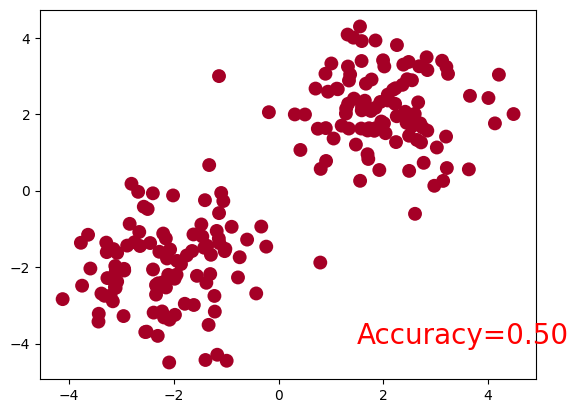

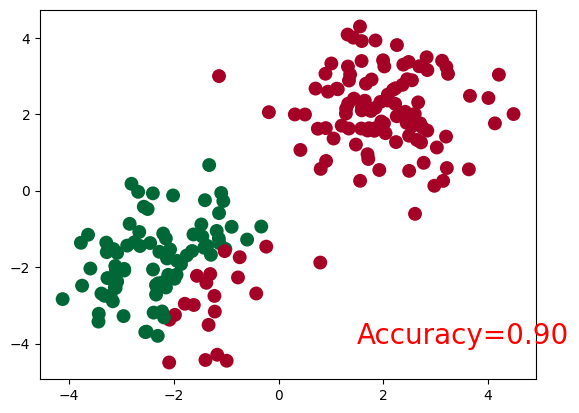

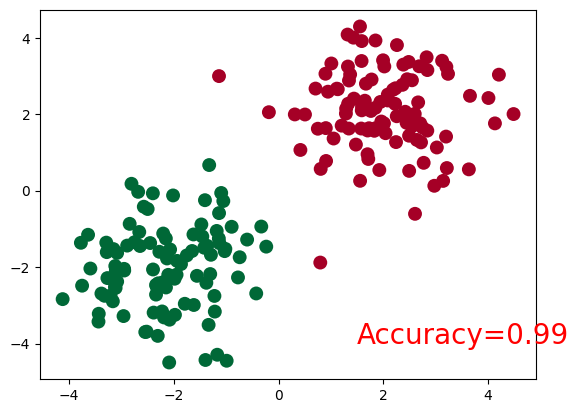

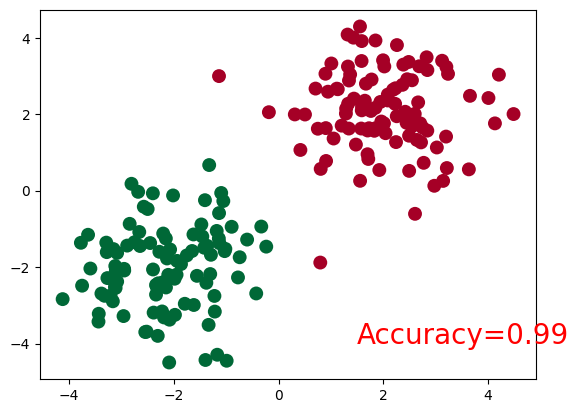

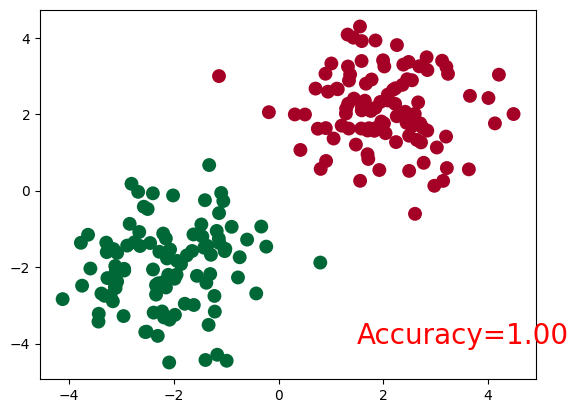

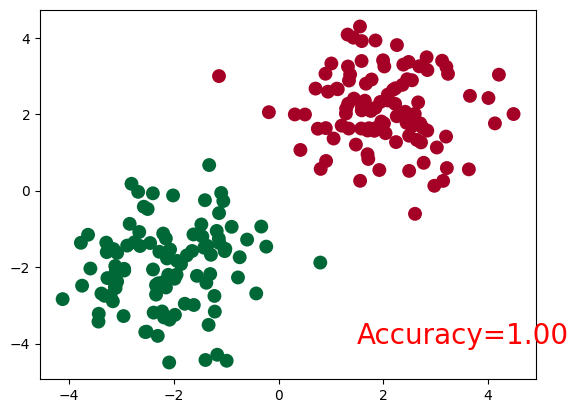

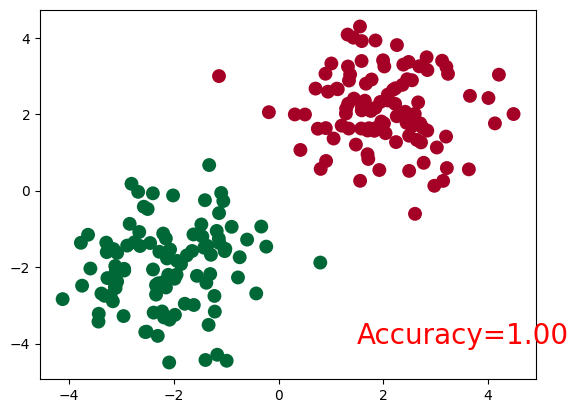

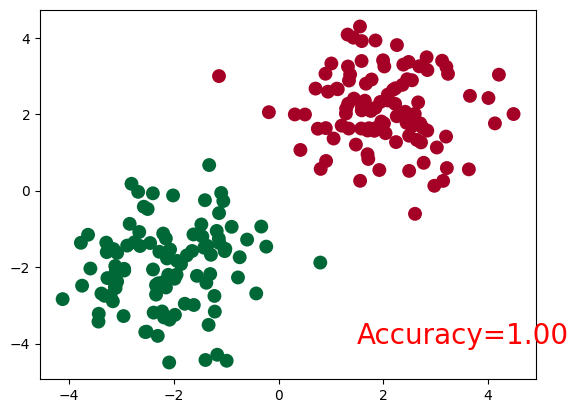

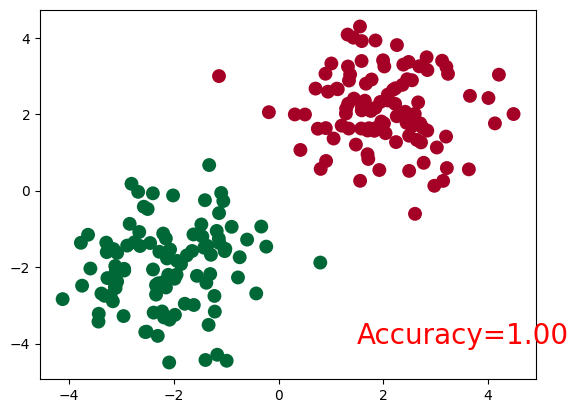

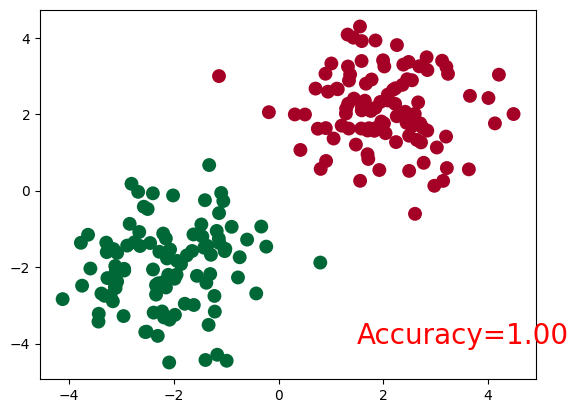

In [21]:
for t in range(20):
    out = net(x)
    loss = loss_fun(out, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if t % 2 == 0:
        plt.cla()
        prediction = torch.max(out, 1)[1]
        pred_y = prediction.data.numpy()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = float((pred_y == target_y).astype(int).sum()) / float(target_y.size)
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)
        
plt.ioff()
plt.show()